# Task 
For each id in the test set, you must predict the probability for each of 7 defect categories:  
Pastry, Z_Scratch, K_Scatch, Stains, Dirtiness, Bumps, Other_Faults.

Input Features 
1. Location Features:  
X_Minimum: The minimum x-coordinate of the fault.  
X_Maximum: The maximum x-coordinate of the fault.  
Y_Minimum: The minimum y-coordinate of the fault.  
Y_Maximum: The maximum y-coordinate of the fault.  
2. Size Features:  
Pixels_Areas: Area of the fault in pixels.  
X_Perimeter: Perimeter along the x-axis of the fault.  
Y_Perimeter: Perimeter along the y-axis of the fault.  
3. Luminosity Features:  
Sum_of_Luminosity: Sum of luminosity values in the fault area.  
Minimum_of_Luminosity: Minimum luminosity value in the fault area.  
Maximum_of_Luminosity: Maximum luminosity value in the fault area.  
4. Material and Index Features:  
TypeOfSteel_A300: Type of steel (A300).  
TypeOfSteel_A400: Type of steel (A400).  
Steel_Plate_Thickness: Thickness of the steel plate.  
Edges_Index, Empty_Index, Square_Index, Outside_X_Index, Edges_X_Index.  
5. Logarithmic Features:  
LogOfAreas: Logarithm of the area of the fault.  
Log_X_Index, Log_Y_Index: Logarithmic indices related to X and Y coordinates.  
6. Statistical Features:  
Orientation_Index: Index describing orientation.  
Luminosity_Index: Index related to luminosity.  
SigmoidOfAreas: Sigmoid function applied to areas.  


Target Features
1. Pastry:
Pastry refers to small patches or irregularities on the surface of the steel plate, typically caused by imperfections in the manufacturing process or handling during transport. These imperfections can affect the surface smoothness and appearance of the steel plate.

2. Z_Scratch:
Z-scratches are narrow scratches or marks on the surface of the steel plate that run parallel to the rolling direction. These scratches can be caused by various factors such as handling, machining, or contact with abrasive materials during production or transportation.

3. K_Scratch:
K-scratches are similar to Z-scratches but run perpendicular to the rolling direction. They can also be caused by handling, machining, or contact with abrasive materials during manufacturing or transportation processes.

4. Stains:
Stains refer to discolored or contaminated areas on the surface of the steel plate. These stains can result from various sources such as rust, oil, grease, or other foreign substances that come into contact with the steel surface during processing, storage, or handling.

5. Dirtiness:
Dirtiness indicates the presence of dirt or particulate matter on the surface of the steel plate. This can include various types of debris or contaminants that accumulate during manufacturing, handling, or storage processes.

6. Bumps:
Bumps are raised or protruding areas on the surface of the steel plate. These can be caused by irregularities in the manufacturing process, such as uneven rolling or cooling, or by physical damage during handling or transportation.

7. Other_Faults:
This category likely encompasses a broader range of faults or defects not specifically categorized in the other fault types listed. It could include various types of surface imperfections, irregularities, or abnormalities that affect the quality or usability of the steel plate. These fault types are typically identified and categorized during quality control inspections to ensure that steel plates meet specified standards and requirements for use in various applications.



In [ ]:
import pandas as pd

In [5]:
test = pd.read_csv('playground-series-s4e3/test.csv')
train = pd.read_csv('playground-series-s4e3/train.csv')

# Data analysis 

In [6]:
train.head()

,id,X_Minimum,X_Maximum,Y_Minimum,Y_Maximum,Pixels_Areas,X_Perimeter,Y_Perimeter,Sum_of_Luminosity,Minimum_of_Luminosity,...,Orientation_Index,Luminosity_Index,SigmoidOfAreas,Pastry,Z_Scratch,K_Scatch,Stains,Dirtiness,Bumps,Other_Faults
0,0,584,590,909972,909977,16,8,5,2274,113,...,-0.5000,-0.0104,0.1417,0,0,0,1,0,0,0
1,1,808,816,728350,728372,433,20,54,44478,70,...,0.7419,-0.2997,0.9491,0,0,0,0,0,0,1
2,2,39,192,2212076,2212144,11388,705,420,1311391,29,...,-0.0105,-0.0944,1.0000,0,0,1,0,0,0,0
3,3,781,789,3353146,3353173,210,16,29,3202,114,...,0.6667,-0.0402,0.4025,0,0,1,0,0,0,0
4,4,1540,1560,618457,618502,521,72,67,48231,82,...,0.9158,-0.2455,0.9998,0,0,0,0,0,0,1


In [7]:
train.shape

(19219, 35)

In [8]:
train.describe()

,id,X_Minimum,X_Maximum,Y_Minimum,Y_Maximum,Pixels_Areas,X_Perimeter,Y_Perimeter,Sum_of_Luminosity,Minimum_of_Luminosity,...,Orientation_Index,Luminosity_Index,SigmoidOfAreas,Pastry,Z_Scratch,K_Scatch,Stains,Dirtiness,Bumps,Other_Faults
count,19219.000000,19219.000000,19219.000000,1.921900e+04,1.921900e+04,19219.000000,19219.000000,19219.000000,1.921900e+04,19219.000000,...,19219.000000,19219.000000,19219.000000,19219.000000,19219.000000,19219.000000,19219.000000,19219.000000,19219.000000,19219.000000
mean,9609.000000,709.854675,753.857641,1.849756e+06,1.846605e+06,1683.987616,95.654665,64.124096,1.918467e+05,84.808419,...,0.102742,-0.138382,0.571902,0.076279,0.059837,0.178573,0.029554,0.025235,0.247828,0.341225
std,5548.191747,531.544189,499.836603,1.903554e+06,1.896295e+06,3730.319865,177.821382,101.054178,4.420247e+05,28.800344,...,0.487681,0.120344,0.332219,0.265450,0.237190,0.383005,0.169358,0.156844,0.431762,0.474133
min,0.000000,0.000000,4.000000,6.712000e+03,6.724000e+03,6.000000,2.000000,1.000000,2.500000e+02,0.000000,...,-0.988400,-0.885000,0.119000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,4804.500000,49.000000,214.000000,6.574680e+05,6.575020e+05,89.000000,15.000000,14.000000,9.848000e+03,70.000000,...,-0.272700,-0.192500,0.253200,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,9609.000000,777.000000,796.000000,1.398169e+06,1.398179e+06,168.000000,25.000000,23.000000,1.823800e+04,90.000000,...,0.111100,-0.142600,0.472900,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,14413.500000,1152.000000,1165.000000,2.368032e+06,2.362511e+06,653.000000,64.000000,61.000000,6.797800e+04,105.000000,...,0.529400,-0.084000,0.999400,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000
max,19218.000000,1705.000000,1713.000000,1.298766e+07,1.298769e+07,152655.000000,7553.000000,903.000000,1.159141e+07,196.000000,...,0.991700,0.642100,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


In [24]:
train[['Pastry' , 'Z_Scratch','K_Scatch', 'Stains', 'Dirtiness', 'Bumps', 'Other_Faults']].describe()

,Pastry,Z_Scratch,K_Scatch,Stains,Dirtiness,Bumps,Other_Faults
count,19219.000000,19219.000000,19219.000000,19219.000000,19219.000000,19219.000000,19219.000000
mean,0.076279,0.059837,0.178573,0.029554,0.025235,0.247828,0.341225
std,0.265450,0.237190,0.383005,0.169358,0.156844,0.431762,0.474133
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000
max,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


In [9]:
train = train.drop(columns=['id'])

In [10]:
train.columns

Index(['X_Minimum', 'X_Maximum', 'Y_Minimum', 'Y_Maximum', 'Pixels_Areas',
       'X_Perimeter', 'Y_Perimeter', 'Sum_of_Luminosity',
       'Minimum_of_Luminosity', 'Maximum_of_Luminosity', 'Length_of_Conveyer',
       'TypeOfSteel_A300', 'TypeOfSteel_A400', 'Steel_Plate_Thickness',
       'Edges_Index', 'Empty_Index', 'Square_Index', 'Outside_X_Index',
       'Edges_X_Index', 'Edges_Y_Index', 'Outside_Global_Index', 'LogOfAreas',
       'Log_X_Index', 'Log_Y_Index', 'Orientation_Index', 'Luminosity_Index',
       'SigmoidOfAreas', 'Pastry', 'Z_Scratch', 'K_Scatch', 'Stains',
       'Dirtiness', 'Bumps', 'Other_Faults'],
      dtype='object')

In [11]:
train.isnull().sum()

X_Minimum                0
X_Maximum                0
Y_Minimum                0
Y_Maximum                0
Pixels_Areas             0
X_Perimeter              0
Y_Perimeter              0
Sum_of_Luminosity        0
Minimum_of_Luminosity    0
Maximum_of_Luminosity    0
Length_of_Conveyer       0
TypeOfSteel_A300         0
TypeOfSteel_A400         0
Steel_Plate_Thickness    0
Edges_Index              0
Empty_Index              0
Square_Index             0
Outside_X_Index          0
Edges_X_Index            0
Edges_Y_Index            0
Outside_Global_Index     0
LogOfAreas               0
Log_X_Index              0
Log_Y_Index              0
Orientation_Index        0
Luminosity_Index         0
SigmoidOfAreas           0
Pastry                   0
Z_Scratch                0
K_Scatch                 0
Stains                   0
Dirtiness                0
Bumps                    0
Other_Faults             0
dtype: int64

In [12]:
train.dtypes

X_Minimum                  int64
X_Maximum                  int64
Y_Minimum                  int64
Y_Maximum                  int64
Pixels_Areas               int64
X_Perimeter                int64
Y_Perimeter                int64
Sum_of_Luminosity          int64
Minimum_of_Luminosity      int64
Maximum_of_Luminosity      int64
Length_of_Conveyer         int64
TypeOfSteel_A300           int64
TypeOfSteel_A400           int64
Steel_Plate_Thickness      int64
Edges_Index              float64
Empty_Index              float64
Square_Index             float64
Outside_X_Index          float64
Edges_X_Index            float64
Edges_Y_Index            float64
Outside_Global_Index     float64
LogOfAreas               float64
Log_X_Index              float64
Log_Y_Index              float64
Orientation_Index        float64
Luminosity_Index         float64
SigmoidOfAreas           float64
Pastry                     int64
Z_Scratch                  int64
K_Scatch                   int64
Stains    

As there is no NaN values I am going to have a look at graphs for float values. It's generally a good practice to normalize data. Then as there is so many columns 

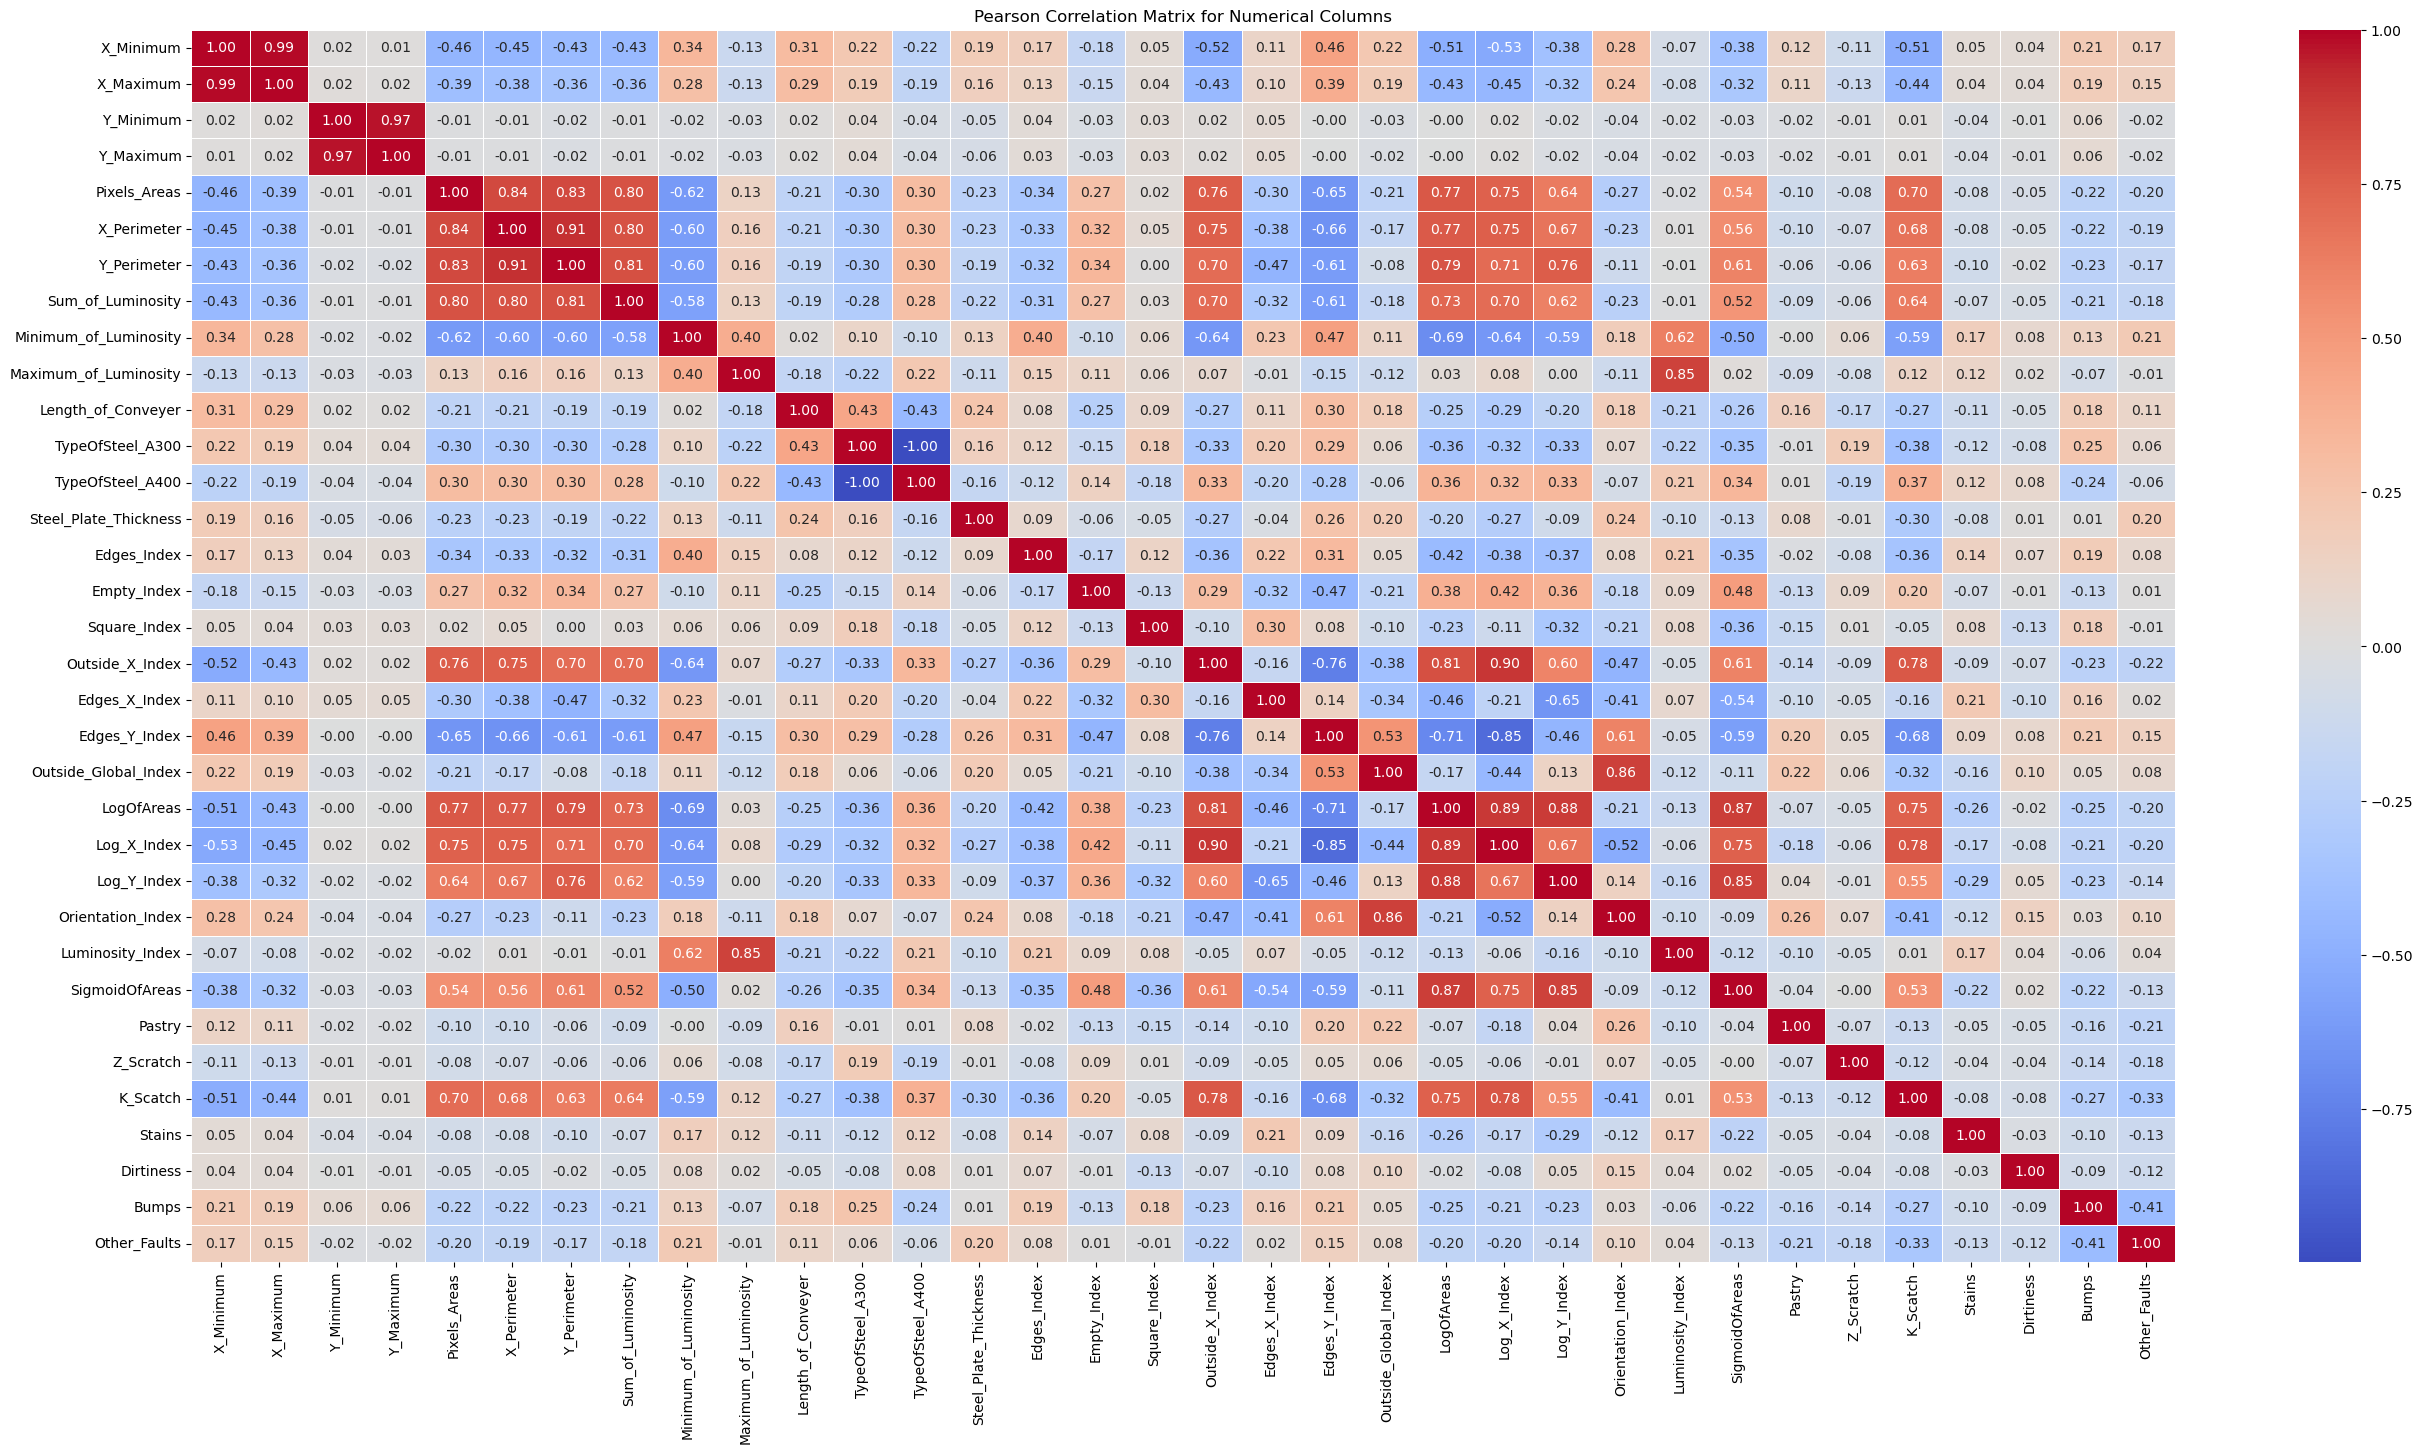

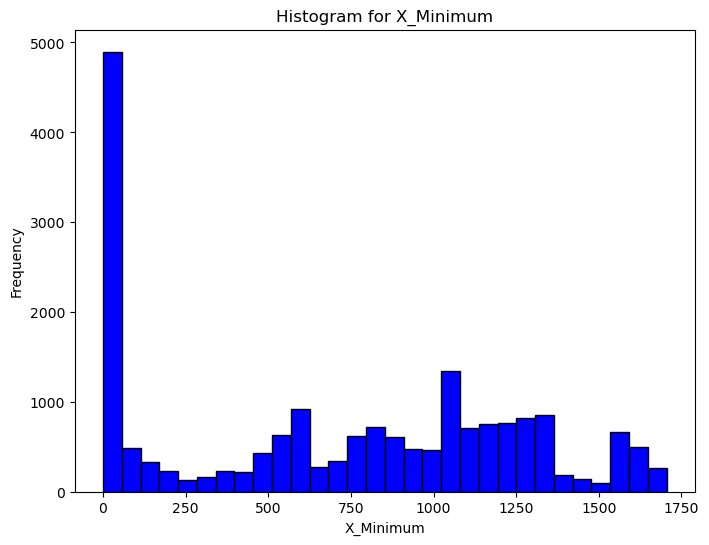

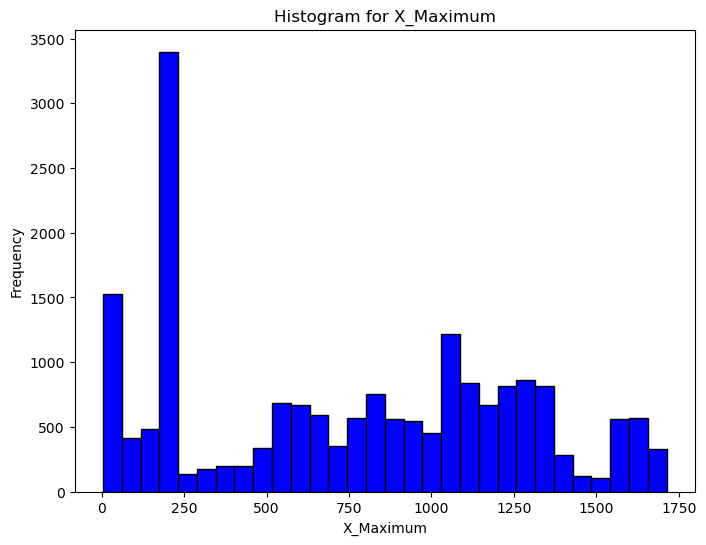

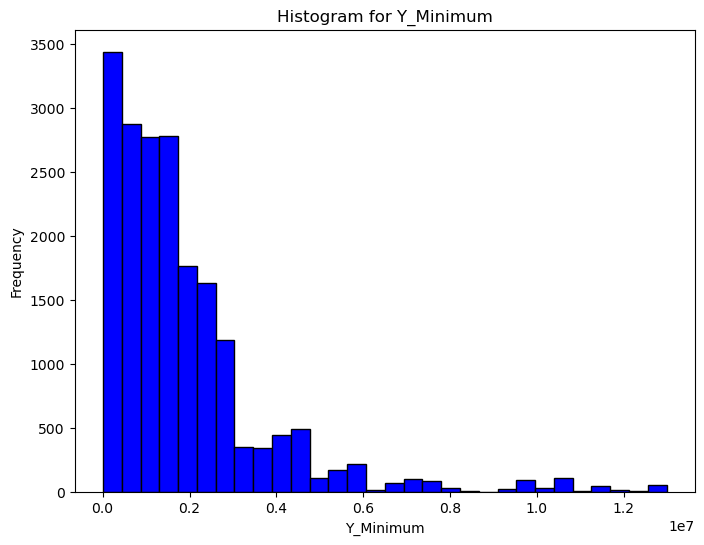

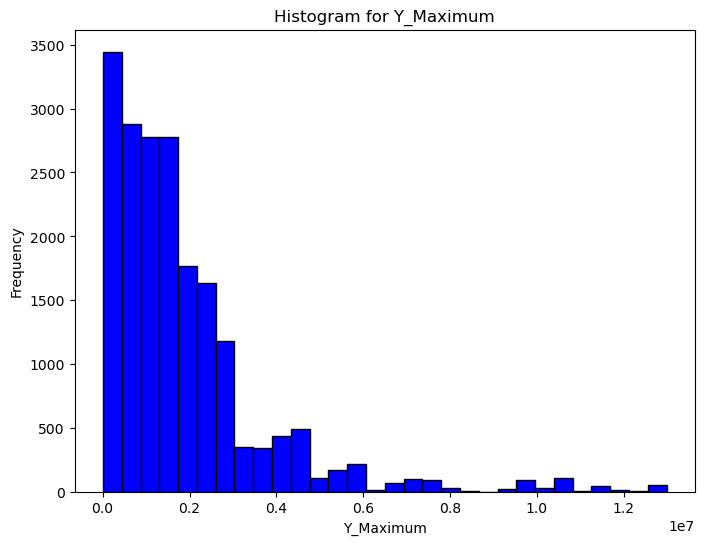

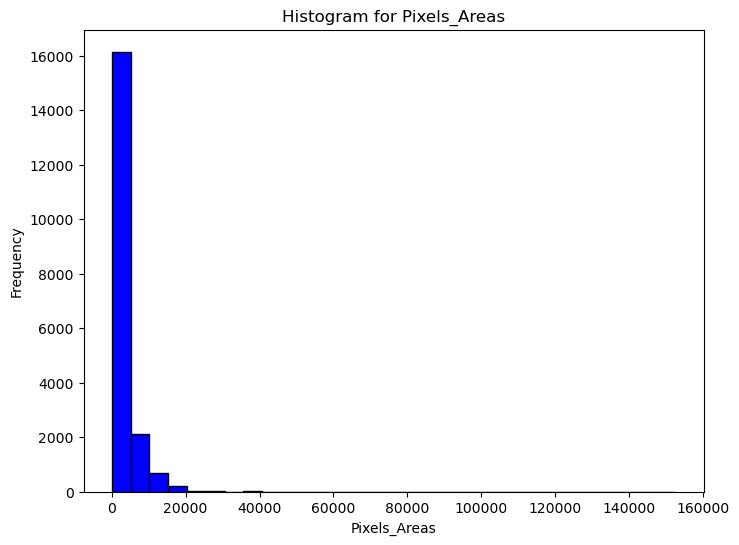

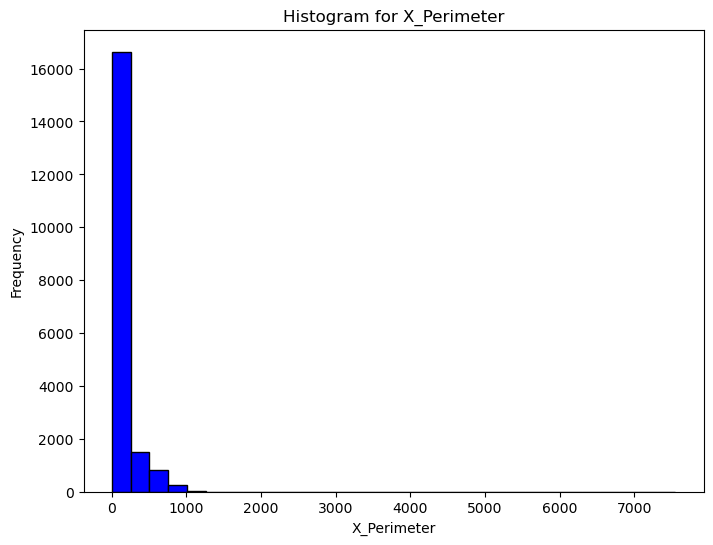

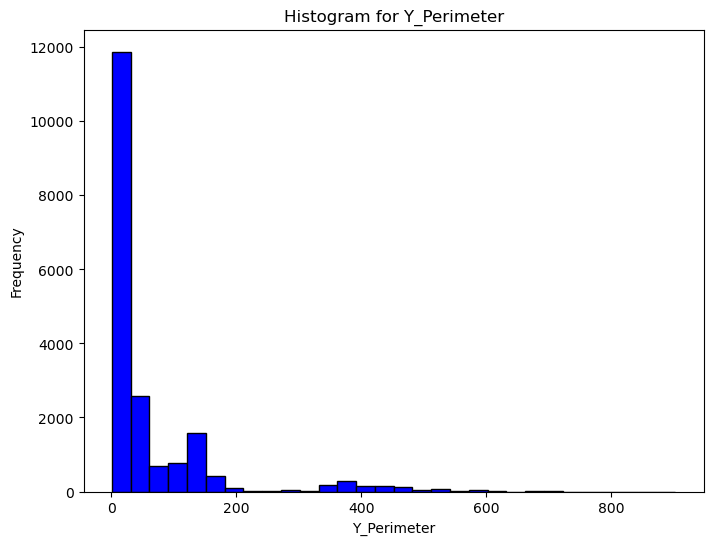

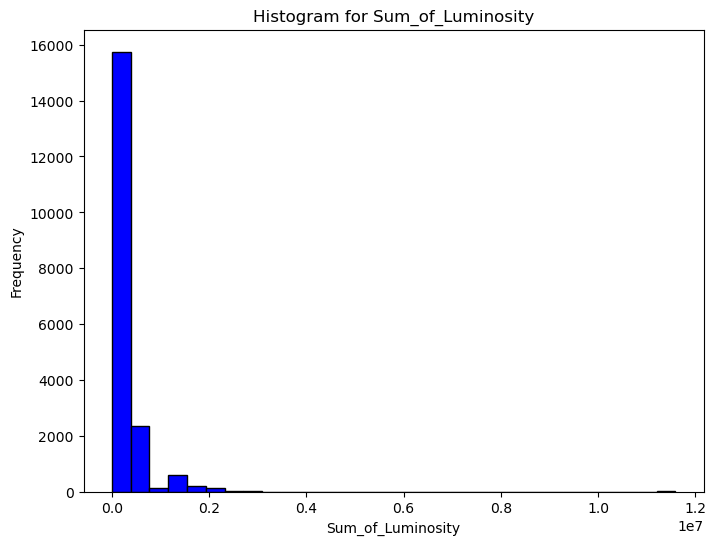

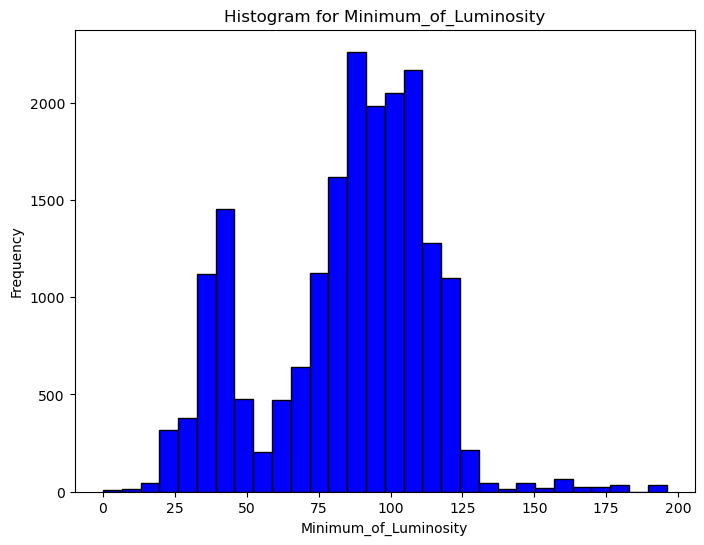

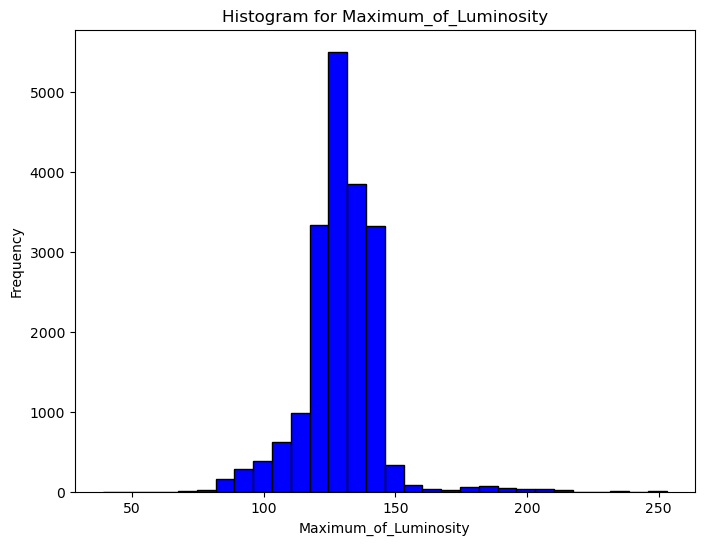

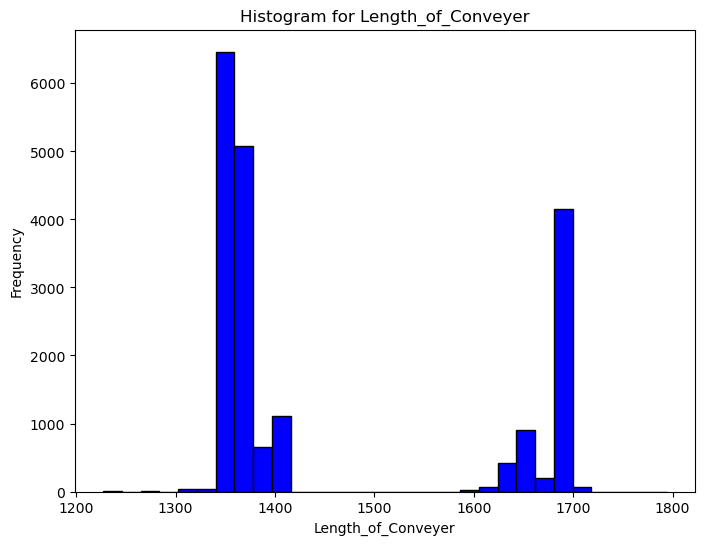

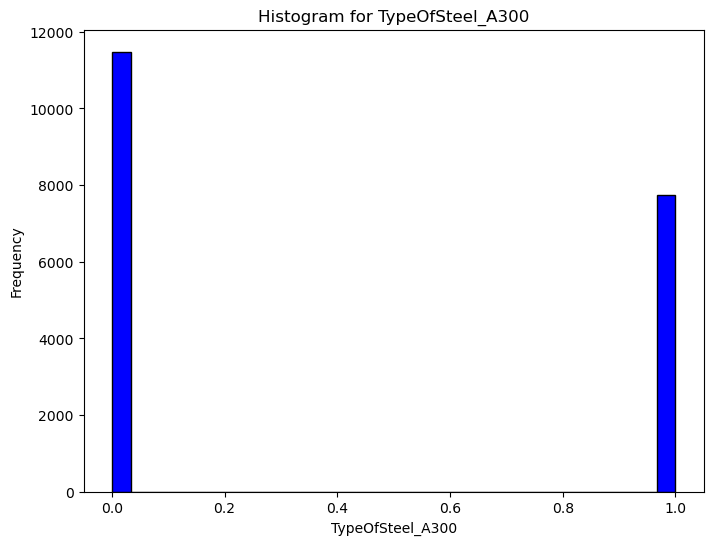

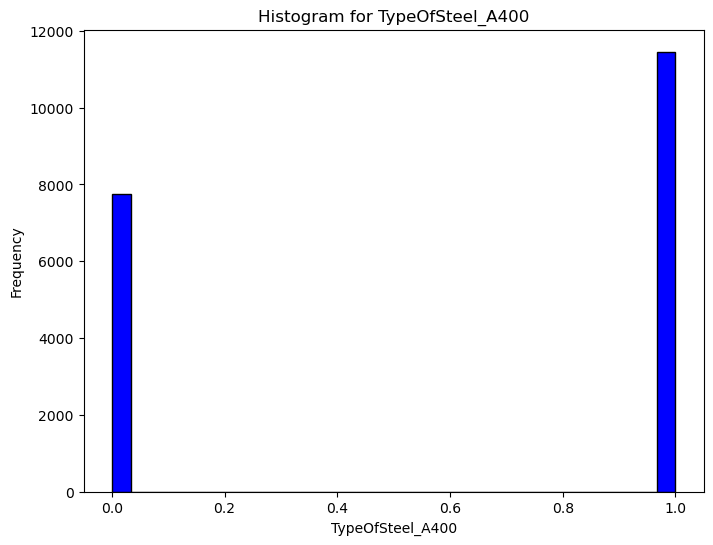

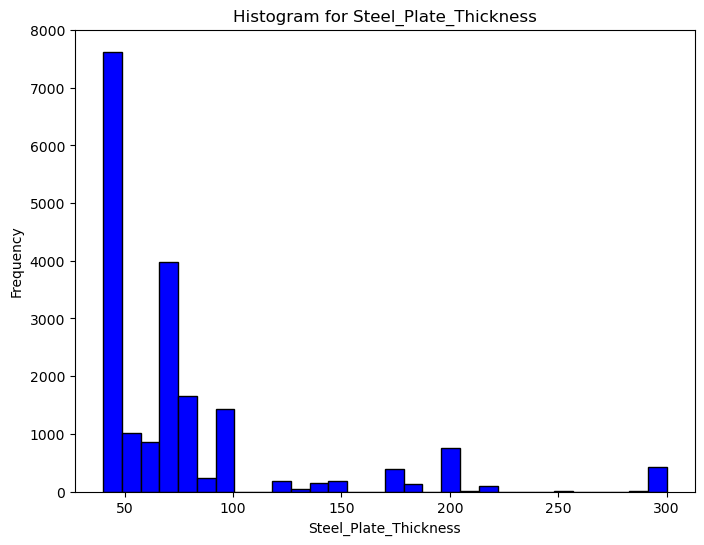

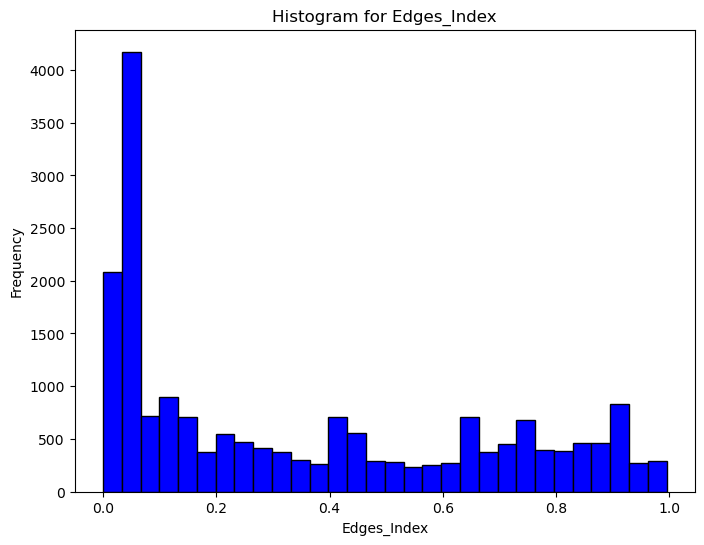

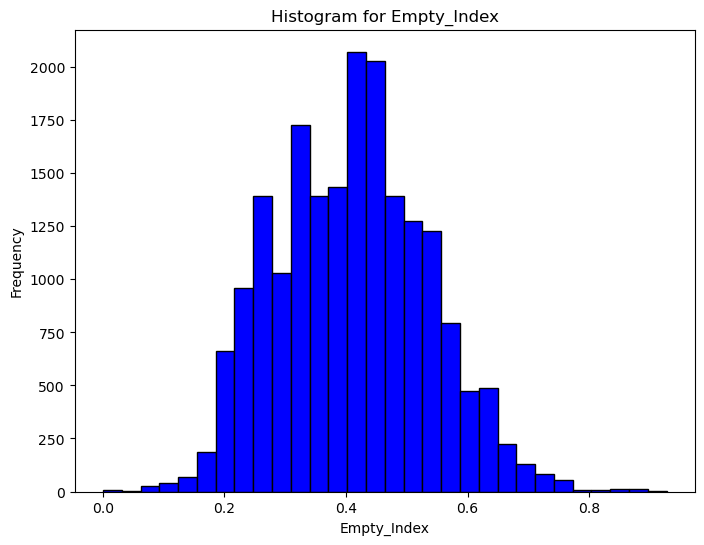

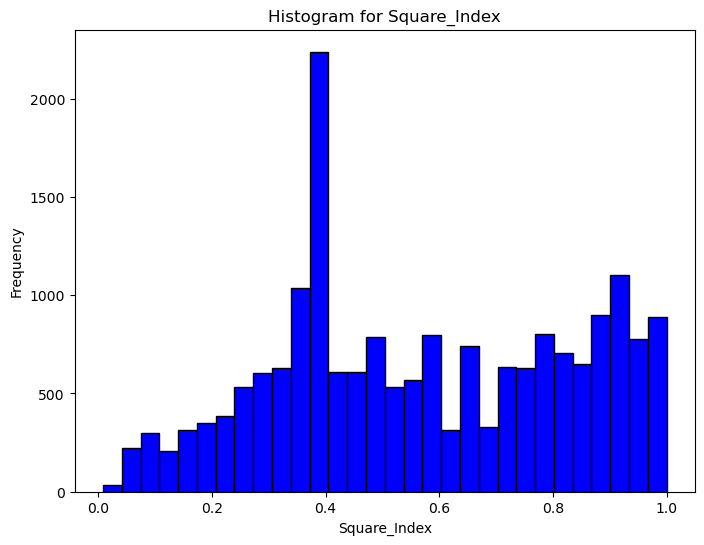

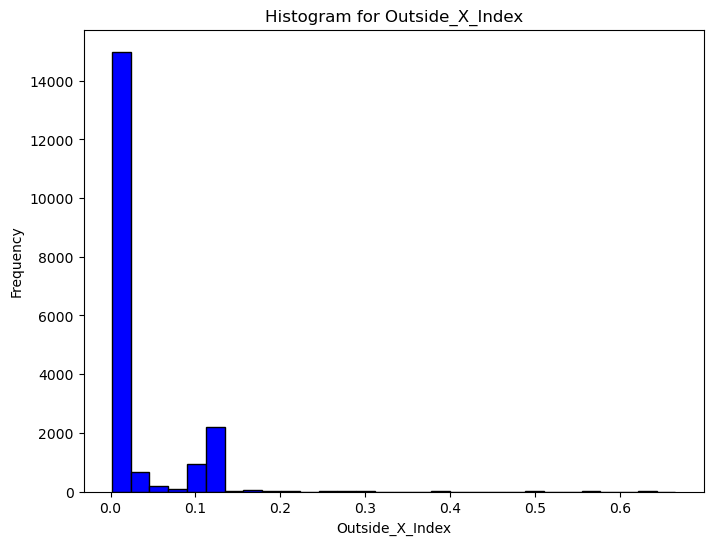

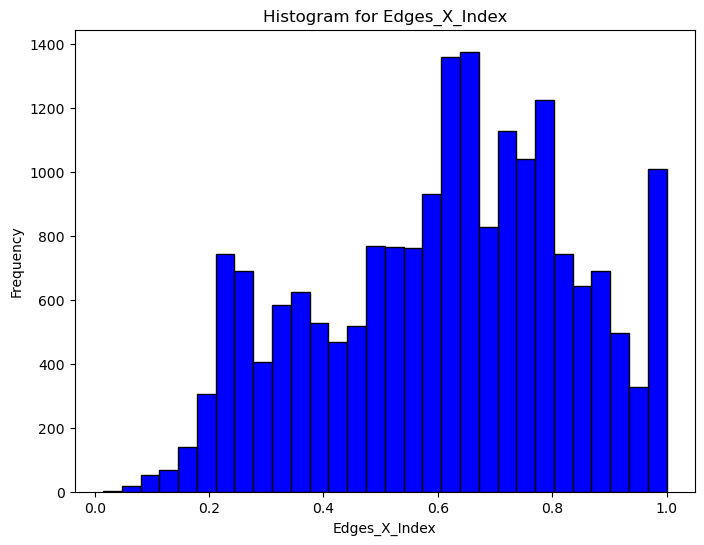

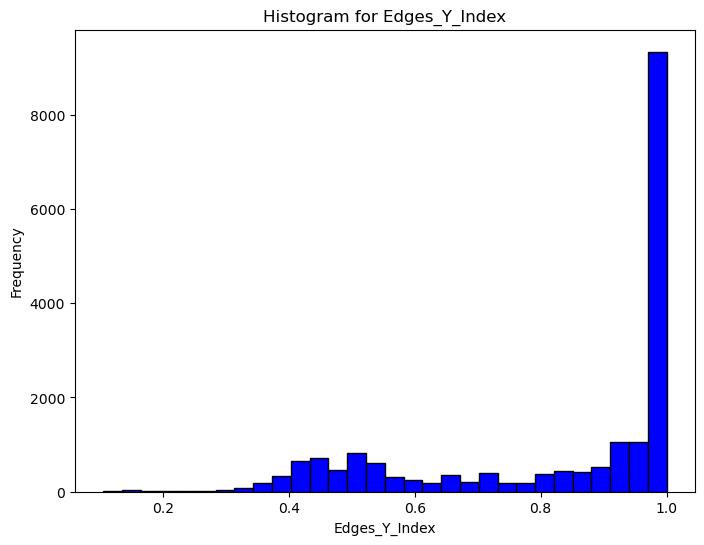

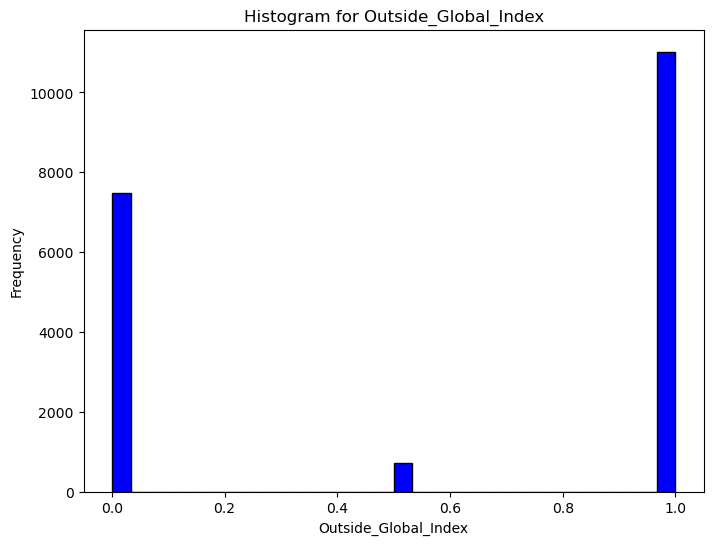

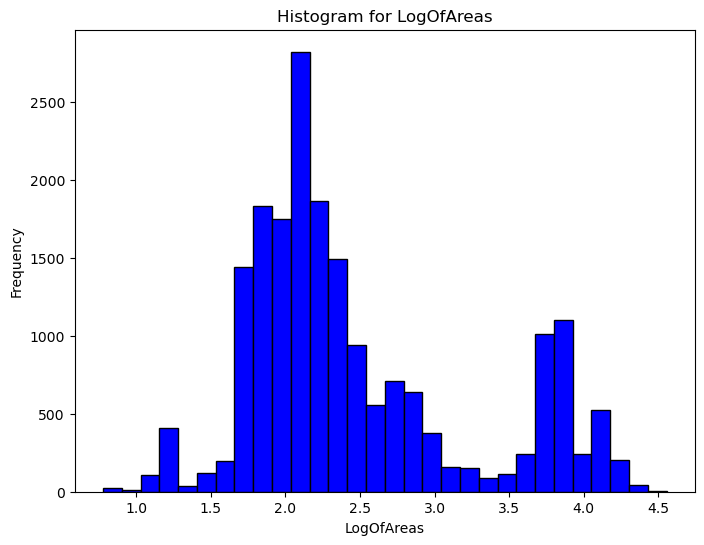

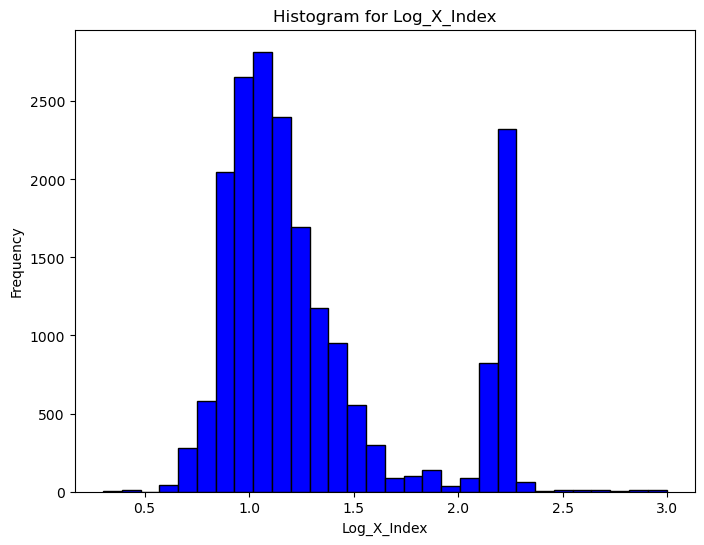

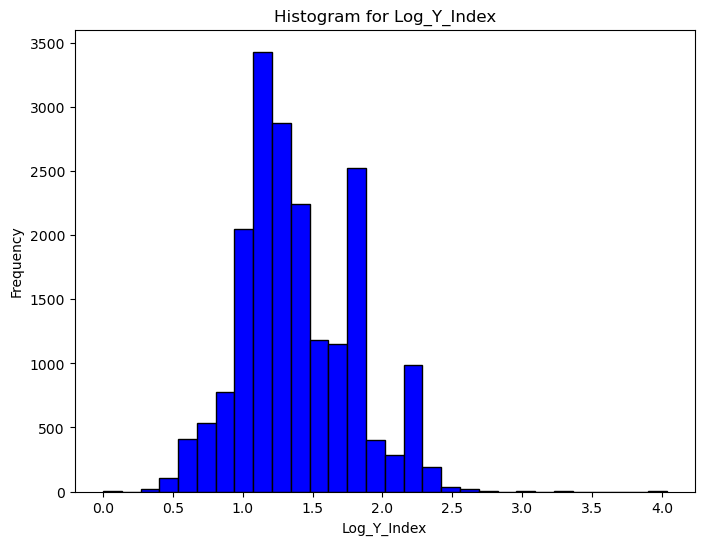

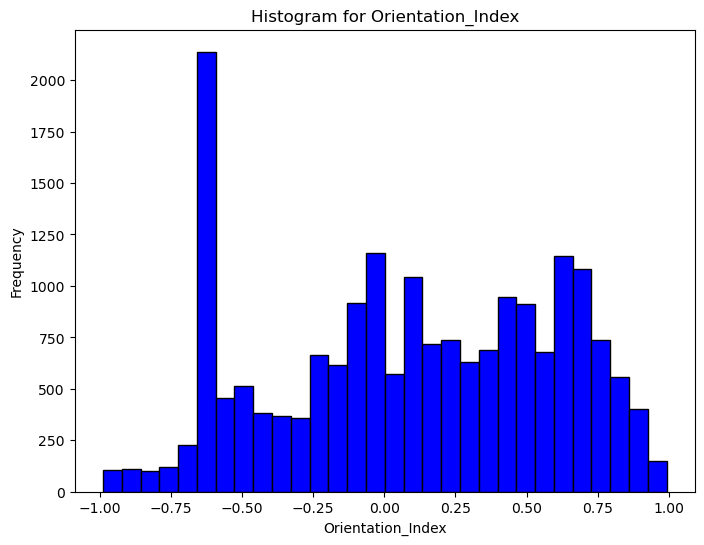

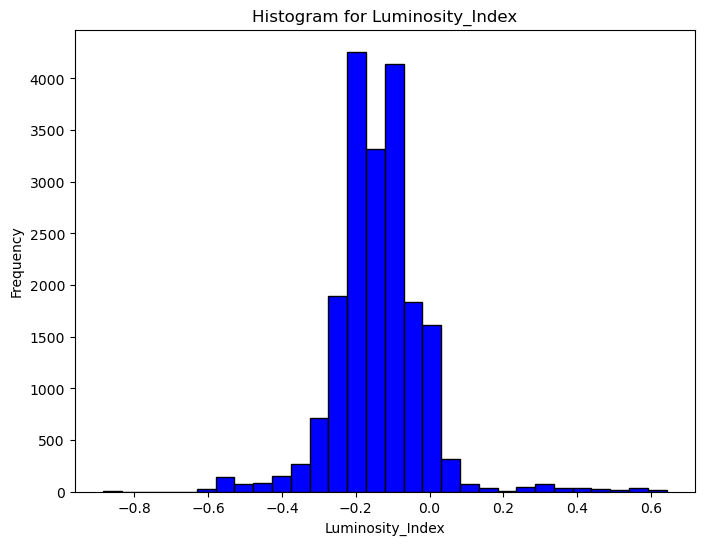

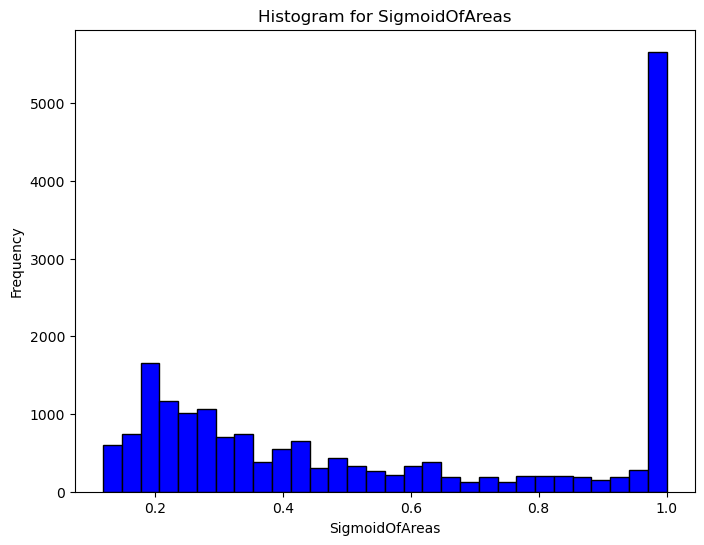

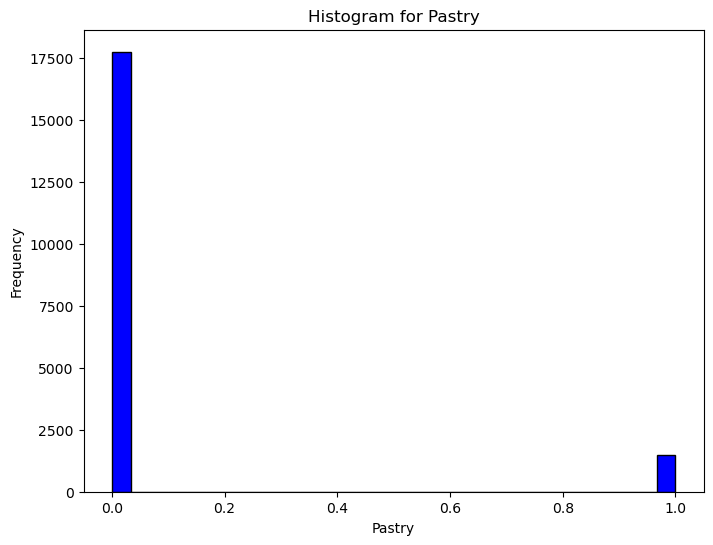

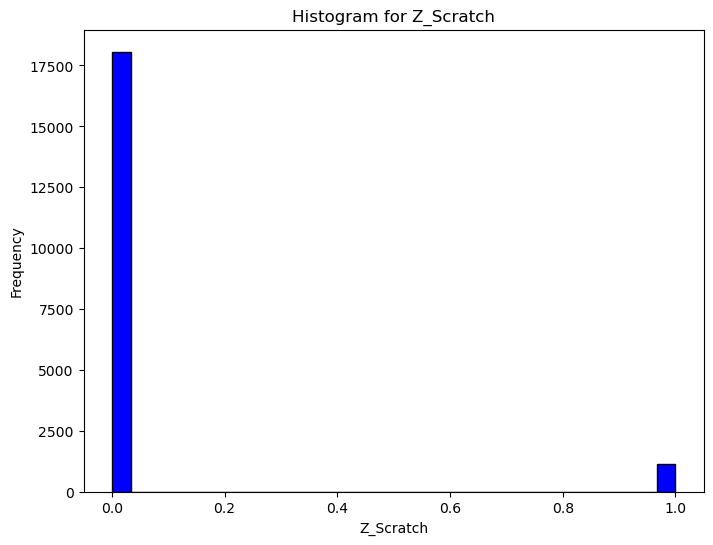

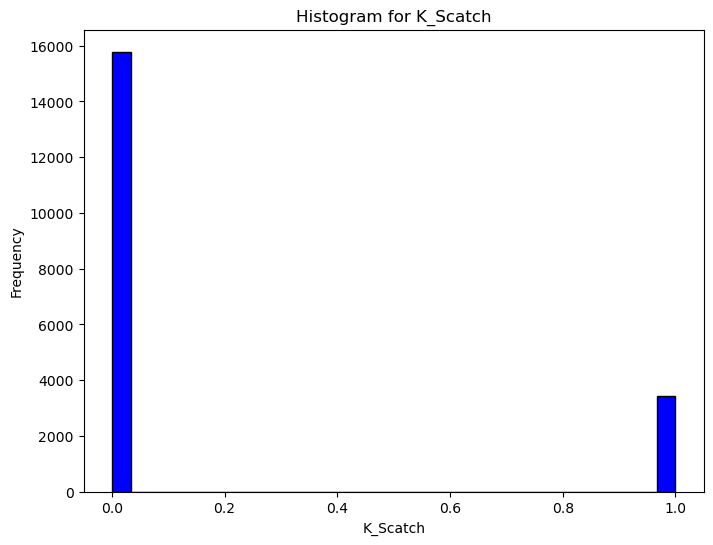

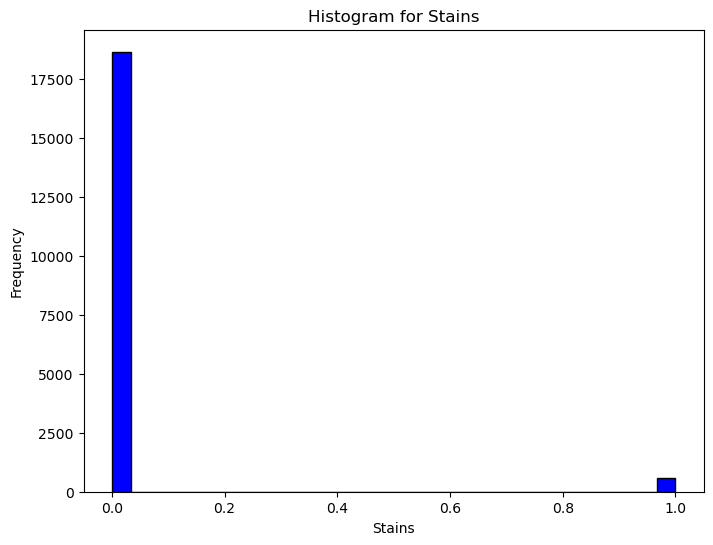

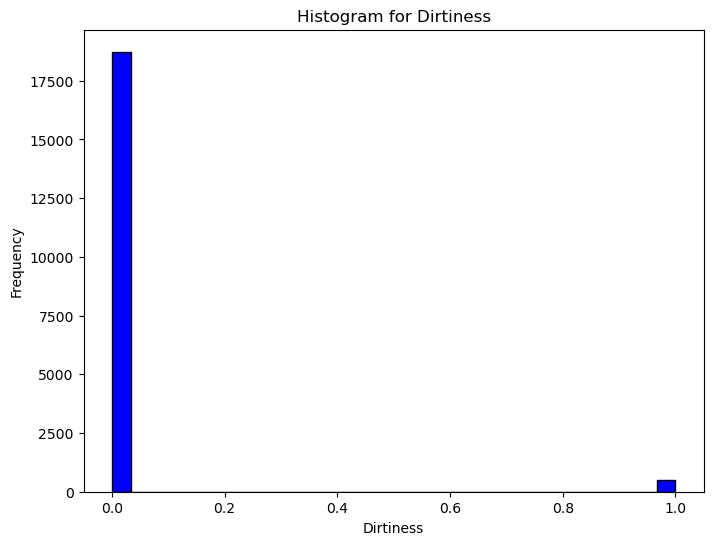

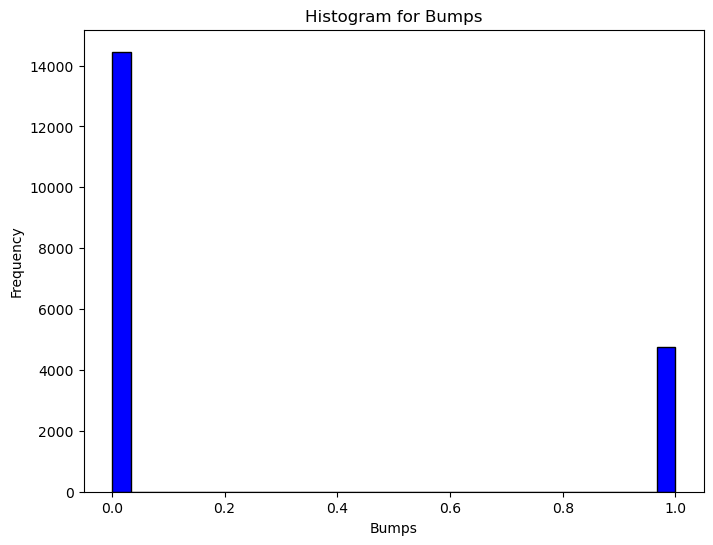

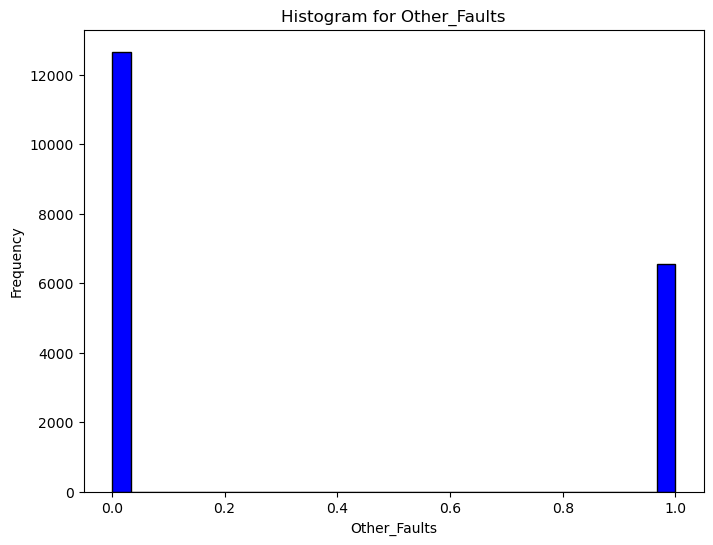

In [15]:
import matplotlib.pyplot as plt
import seaborn as sns

# Identify columns with numeric data (both integer and float)
numeric_columns = train.select_dtypes(include=['int64', 'float64']).columns

# Create a Pearson correlation matrix
correlation_matrix = train[numeric_columns].corr()

# Plot the correlation matrix as a heatmap
plt.figure(figsize=(32, 16))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt='.2f', linewidths=0.5)
plt.title('Pearson Correlation Matrix for Numerical Columns')
plt.show()

# Plot histograms for numeric columns
for column in numeric_columns:
    plt.figure(figsize=(8, 6))
    plt.hist(train[column].dropna(), bins=30, color='blue', edgecolor='black')
    plt.title(f'Histogram for {column}')
    plt.xlabel(column)
    plt.ylabel('Frequency')
    plt.show()